In [34]:
print("Shree")

Shree


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns   


In [36]:
data = pd.read_csv('2021_census.csv')

In [37]:
data.head()

local authority name  All usual residents  White British  White Irish  \
0        City of London                 8584           3652          186   
1  Barking and Dagenham                 3963            447           17   
2  Barking and Dagenham                 9889           3845           71   
3  Barking and Dagenham                10055           1943           23   
4  Barking and Dagenham                 8360           2488           73   

   White Gypsy/Irish Traveller  White Other  Mixed White and Asian  \
0                            0         2065                    173   
1                            3          691                     28   
2                           15         1555                     55   
3                            3         1163                     60   
4                           17         1202                     48   

   Mixed White and Black African  Mixed White and Black Caribbean  \
0                             50                               56   
1                             29                               30   
2                             60                              117   
3                            163                              175   
4                            122                               88   

   Mixed Other  ...  Asian Chinese  Asian Indian  Asian Pakistani  \
0          188  ...            544           322               32   
1           36  ...             87           968              358   
2           96  ...             67           247              282   
3          176  ...             91           374              593   
4           85  ...             41           301              358   

   Asian Other  Black African  Black Caribbean  Black Other  Other Arab  \
0          259            150               54           26         113   
1          131            453               68           70          42   
2          296           1529              214          237          57   
3          201           2815              402          547          92   
4          156           1814              251          297          39   

   Other Any other  White Roma  
0              369          62  
1              125          34  
2              240          47  
3              247          18  
4              256          25  

[5 rows x 21 columns]

In [38]:
data.columns[0]

'local authority name'

In [39]:
grouped_data = data.groupby(data.columns[0]).sum()
grouped_data_copy = grouped_data.copy()
grouped_data.head()
grouped_data.to_csv('test.csv')

In [40]:
grouped_data.columns

Index(['All usual residents', 'White British', 'White Irish',
       'White Gypsy/Irish Traveller', 'White Other', 'Mixed White and Asian',
       'Mixed White and Black African', 'Mixed White and Black Caribbean',
       'Mixed Other', 'Asian Bangladeshi', 'Asian Chinese', 'Asian Indian',
       'Asian Pakistani', 'Asian Other', 'Black African', 'Black Caribbean',
       'Black Other', 'Other Arab', 'Other Any other', 'White Roma'],
      dtype='object')

In [41]:
grouped_data.shape

(33, 20)

In [42]:
grouped_data['Others'] = grouped_data['White Other'] + grouped_data['Asian Other'] + grouped_data['Black Other'] + grouped_data['Mixed Other'] + grouped_data['Other Any other'] + grouped_data['Other Arab']

In [43]:
grouped_data = grouped_data.drop(columns=['All usual residents','Black Other', 'White Other', 'Mixed Other', 'Asian Other','Other Any other', 'Other Arab' ])


In [44]:
grouped_data.head()

White British  White Irish  White Gypsy/Irish Traveller  \
local authority name                                                            
Barking and Dagenham          67558         1191                          189   
Barnet                       140792         7629                          178   
Bexley                       158871         2523                          619   
Brent                         51629         9302                          236   
Bromley                      219488         4962                          575   

                      Mixed White and Asian  Mixed White and Black African  \
local authority name                                                         
Barking and Dagenham                   1549                           2376   
Barnet                                 6055                           3766   
Bexley                                 2178                           1734   
Brent                                  3627                           3186   
Bromley                                4729                           2436   

                      Mixed White and Black Caribbean  Asian Bangladeshi  \
local authority name                                                       
Barking and Dagenham                             2984              22382   
Barnet                                           3495               2887   
Bexley                                           2493               1777   
Brent                                            3787               2166   
Bromley                                          5506               1747   

                      Asian Chinese  Asian Indian  Asian Pakistani  \
local authority name                                                 
Barking and Dagenham           1378         11482            15789   
Barnet                         9395         30397             6708   
Bexley                         4002         10909             1399   
Brent                          3397         66167            15199   
Bromley                        5088         12311             1780   

                      Black African  Black Caribbean  White Roma  Others  
local authority name                                                      
Barking and Dagenham          35093             5840         854   50201  
Barnet                        22651             4946        1557  148945  
Bexley                        23241             3236         312   33226  
Brent                         31088            21266        2508  126331  
Bromley                       13208             8142         553   49411

In [45]:
grouped_data['Total_Population'] = grouped_data.sum(axis=1)


In [46]:
grouped_data['Total_Population'] = grouped_data.sum(axis=1)
ethnic_columns = grouped_data.columns[:-1]  # All columns except 'Total Population'
data_percentage = grouped_data[ethnic_columns].div(grouped_data['Total_Population'], axis=0) * 100

In [47]:
ethnic_columns

Index(['White British', 'White Irish', 'White Gypsy/Irish Traveller',
       'Mixed White and Asian', 'Mixed White and Black African',
       'Mixed White and Black Caribbean', 'Asian Bangladeshi', 'Asian Chinese',
       'Asian Indian', 'Asian Pakistani', 'Black African', 'Black Caribbean',
       'White Roma', 'Others'],
      dtype='object')

In [48]:
data_percentage

White British  White Irish  \
local authority name                                 
Barking and Dagenham        15.433644     0.272084   
Barnet                      18.078022     0.979581   
Bexley                      32.222741     0.511723   
Brent                        7.594980     1.368388   
Bromley                     33.262208     0.751964   
Camden                      17.686818     1.268051   
City of London              21.272134     1.083411   
Croydon                     18.717318     0.628876   
Ealing                      12.155111     1.161001   
Enfield                     15.628770     0.904478   
Greenwich                   20.699448     0.735078   
Hackney                     16.964658     1.076512   
Hammersmith and Fulham      19.132925     1.312650   
Haringey                    15.942251     1.079911   
Harrow                      10.251714     1.070817   
Havering                    33.247219     0.553891   
Hillingdon                  18.525570     0.913899   
Hounslow                    14.218713     0.674281   
Islington                   19.880166     1.634034   
Kensington and Chelsea      16.353151     0.980666   
Kingston upon Thames        26.866729     0.784613   
Lambeth                     18.792117     1.074083   
Lewisham                    18.591427     0.838401   
Merton                      20.597993     1.006412   
Newham                       7.379090     0.291465   
Redbridge                   11.579395     0.499754   
Richmond upon Thames        31.511615     1.245769   
Southwark                   17.754559     0.979819   
Sutton                      28.627744     0.743339   
Tower Hamlets               11.473029     0.572402   
Waltham Forest              17.016627     0.760612   
Wandsworth                  23.980709     1.229807   
Westminster                 14.002761     0.910653   

                        White Gypsy/Irish Traveller  Mixed White and Asian  \
local authority name                                                         
Barking and Dagenham                       0.043177               0.353869   
Barnet                                     0.022856               0.777476   
Bexley                                     0.125548               0.441749   
Brent                                      0.034717               0.533557   
Bromley                                    0.087138               0.716654   
Camden                                     0.031880               1.011348   
City of London                             0.000000               1.007689   
Croydon                                    0.027259               0.734841   
Ealing                                     0.034179               0.745950   
Enfield                                    0.056378               0.578939   
Greenwich                                  0.066762               0.598094   
Hackney                                    0.047275               0.712400   
Hammersmith and Fulham                     0.025931               0.852445   
Haringey                                   0.043113               0.746161   
Harrow                                     0.033493               0.603065   
Havering                                   0.048845               0.446853   
Hillingdon                                 0.078446               0.687058   
Hounslow                                   0.051881               0.713495   
Islington                                  0.024706               0.865389   
Kensington and Chelsea                     0.028607               1.064743   
Kingston upon Thames                       0.018752               1.056667   
Lambeth                                    0.022347               0.712121   
Lewisham                                   0.018971               0.722243   
Merton                                     0.043676               0.872131   
Newham                                     0.050430               0.473525   
Redbridge                  

In [49]:
#data_percentage = data_percentage.drop(columns=['Total_Population'])
ethnic_columns = ethnic_columns[:-1]

In [50]:
ethnic_columns

Index(['White British', 'White Irish', 'White Gypsy/Irish Traveller',
       'Mixed White and Asian', 'Mixed White and Black African',
       'Mixed White and Black Caribbean', 'Asian Bangladeshi', 'Asian Chinese',
       'Asian Indian', 'Asian Pakistani', 'Black African', 'Black Caribbean',
       'White Roma'],
      dtype='object')

#### Distribution and Visualization

<Figure size 1400x800 with 0 Axes>

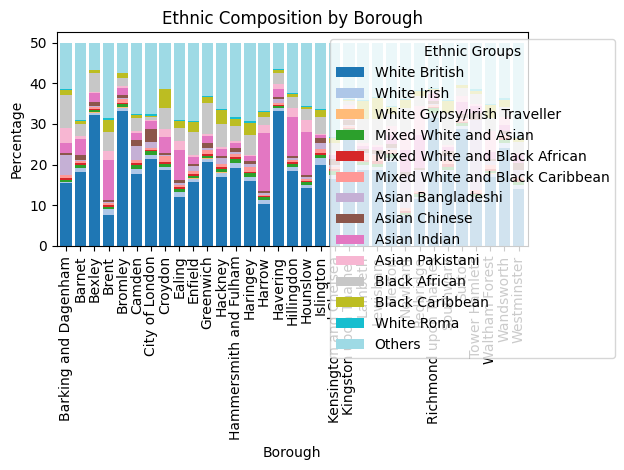

In [51]:
plt.figure(figsize=(14, 8))
data_percentage.plot(kind='bar', stacked=True, colormap='tab20', width=0.8)
plt.title("Ethnic Composition by Borough")
plt.xlabel("Borough")
plt.ylabel("Percentage")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title="Ethnic Groups")
plt.tight_layout()
plt.show()

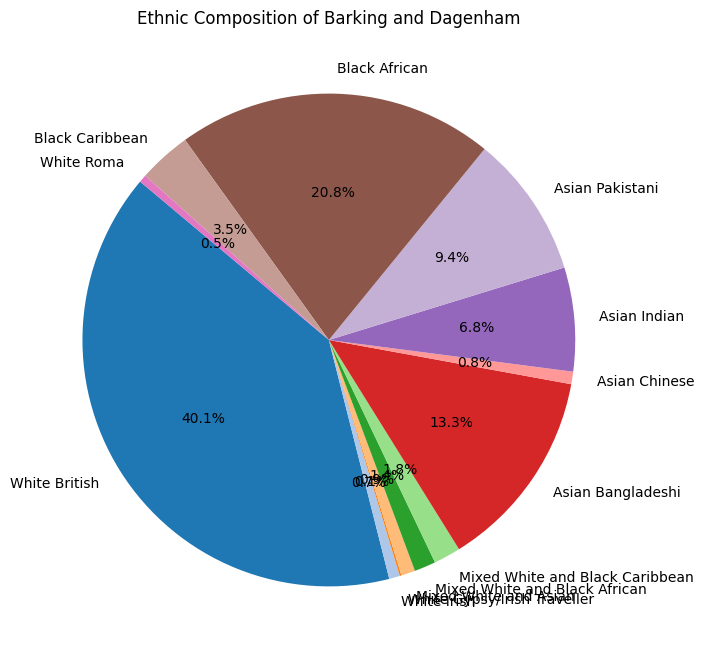

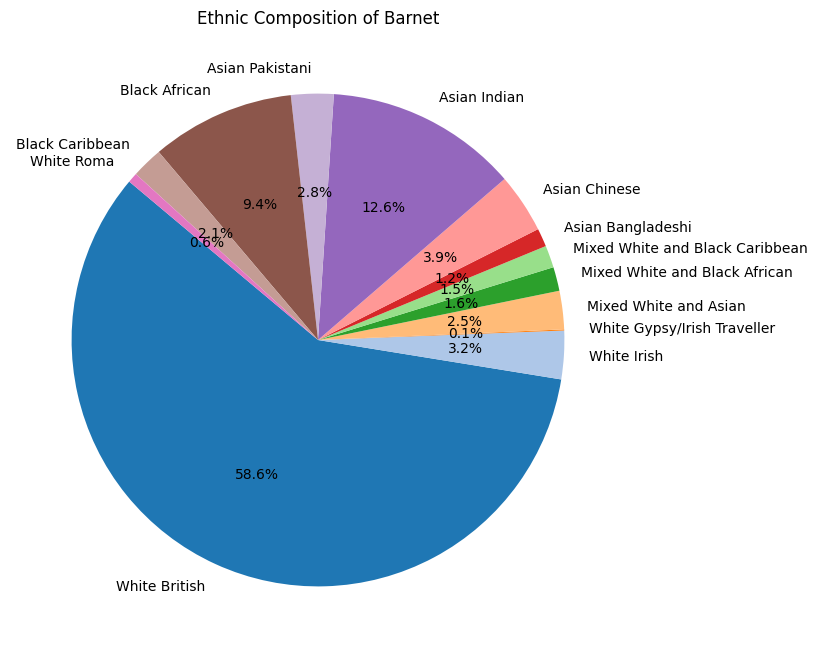

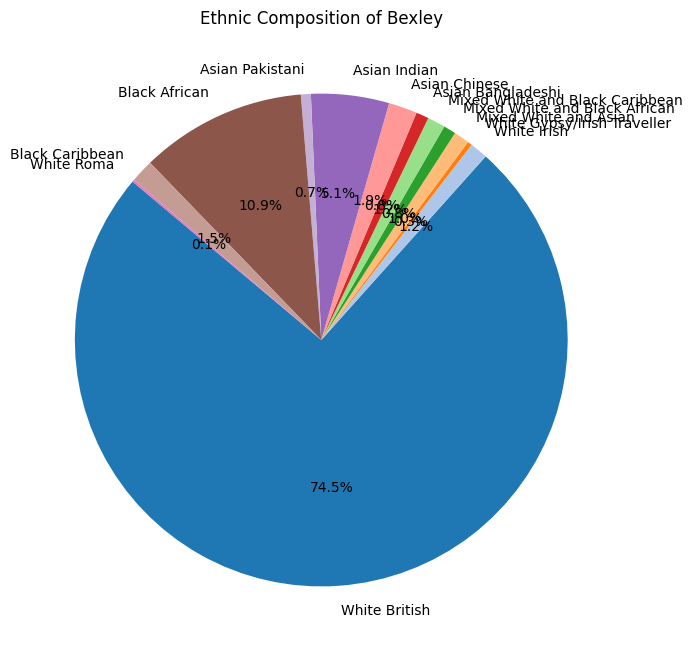

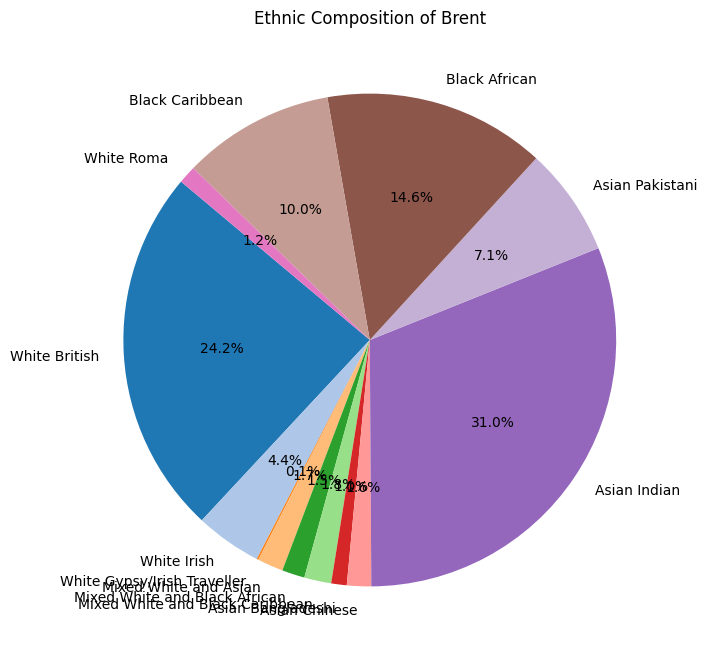

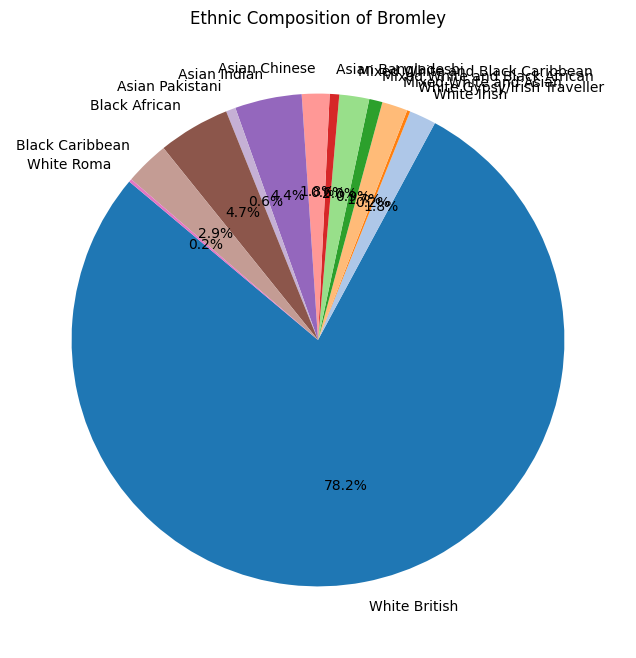

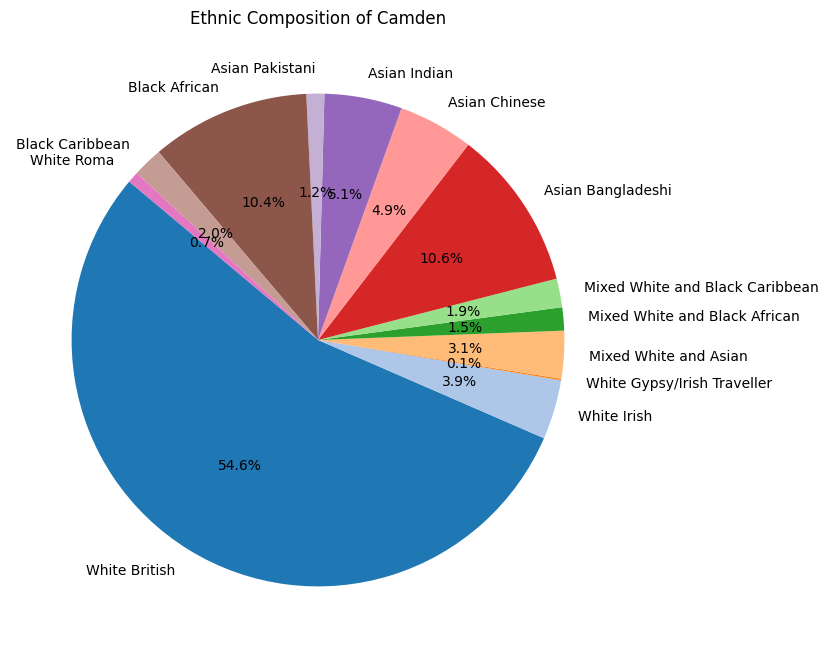

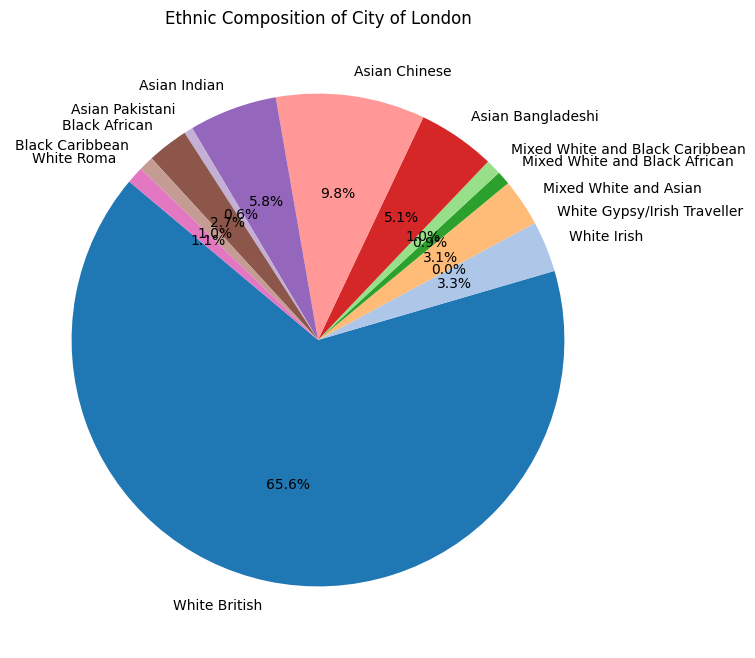

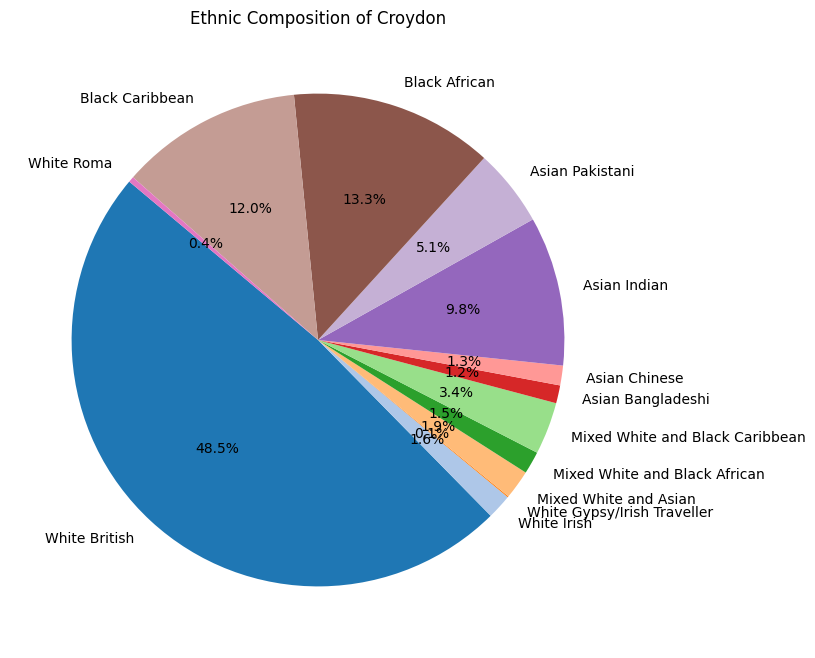

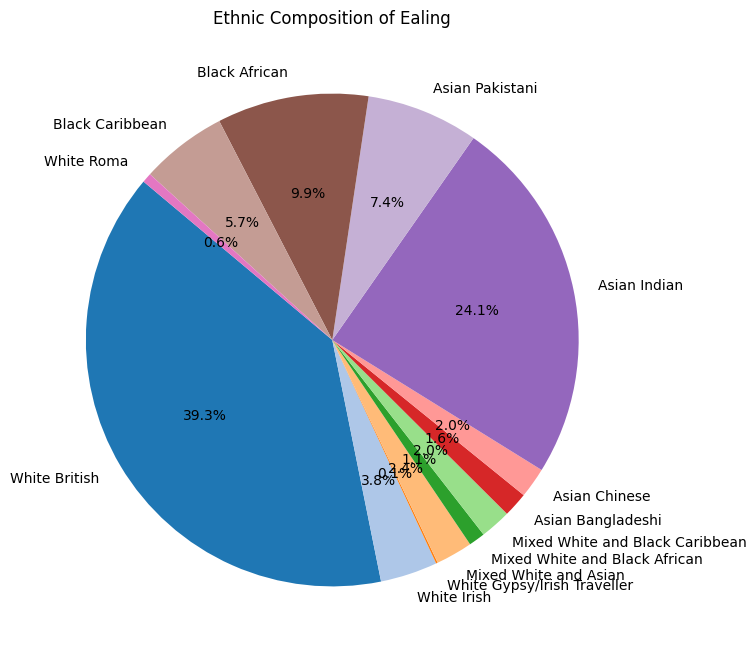

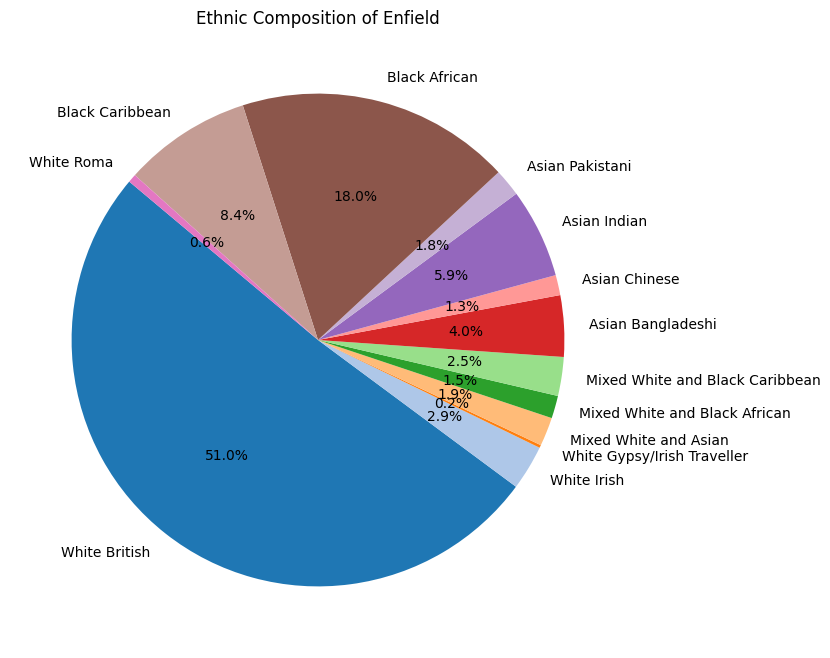

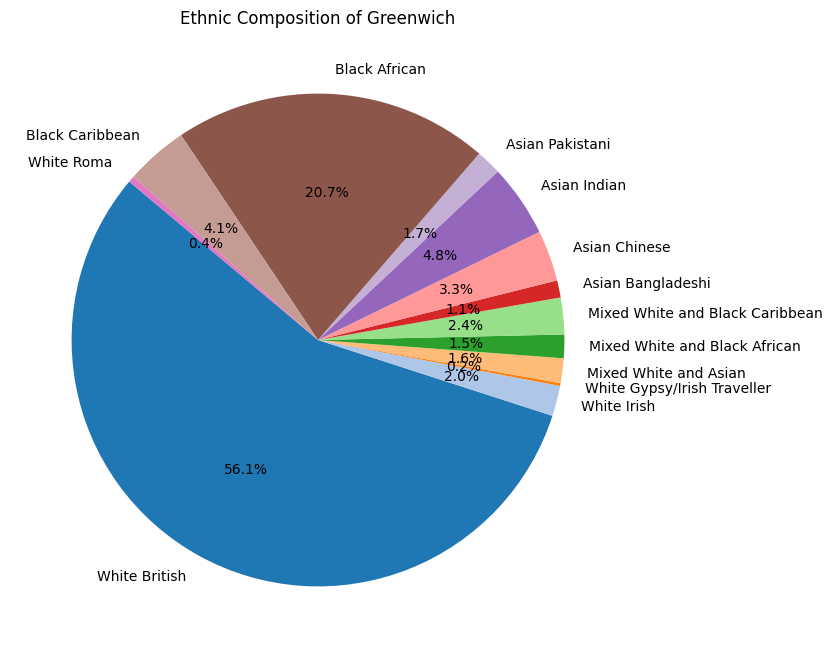

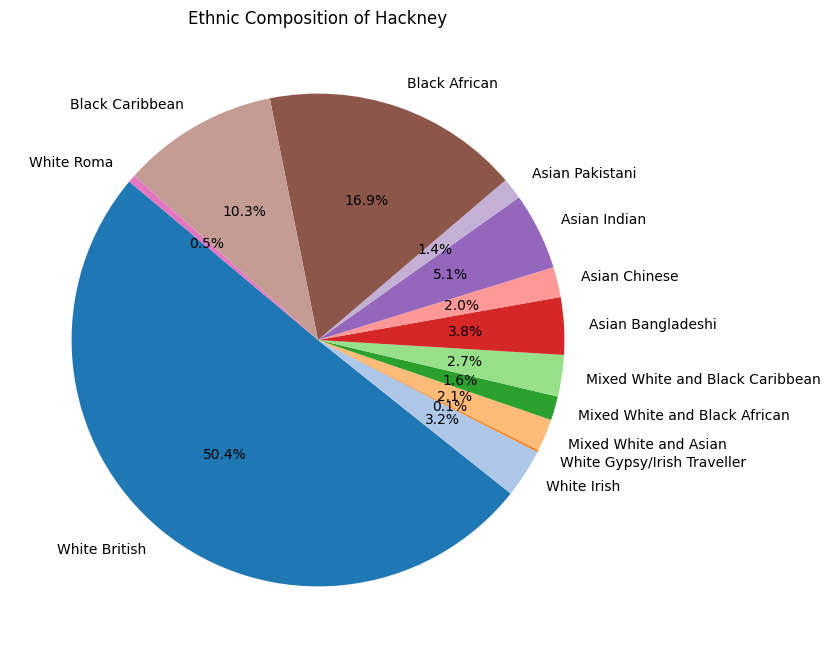

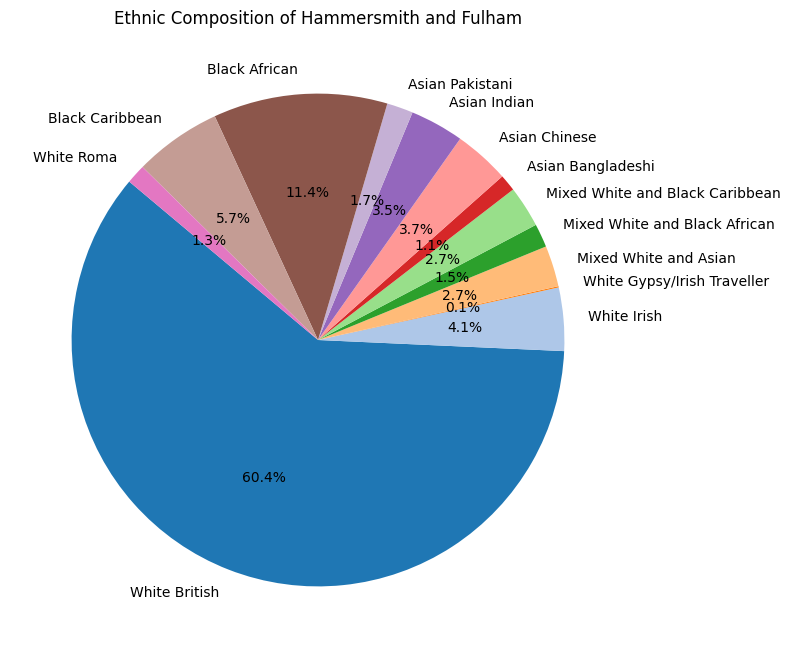

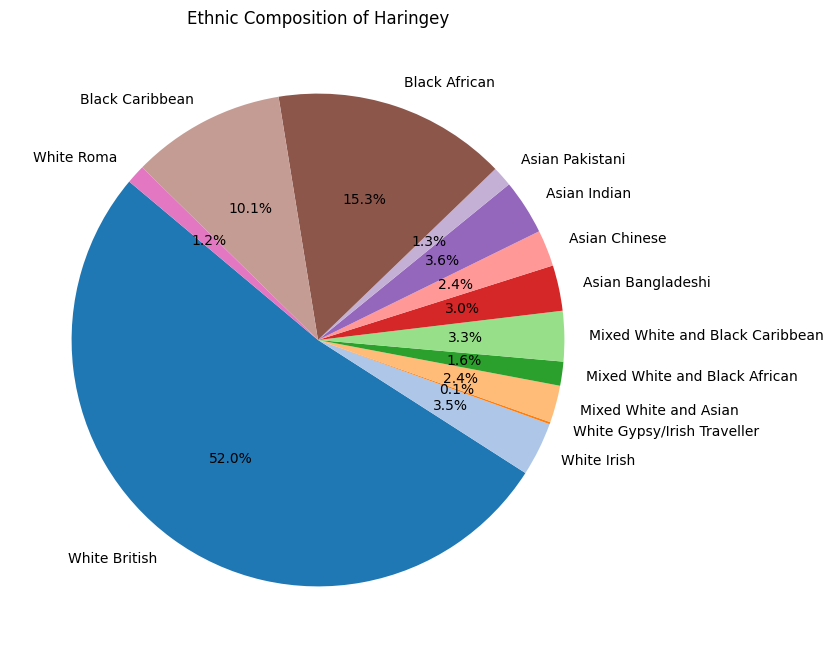

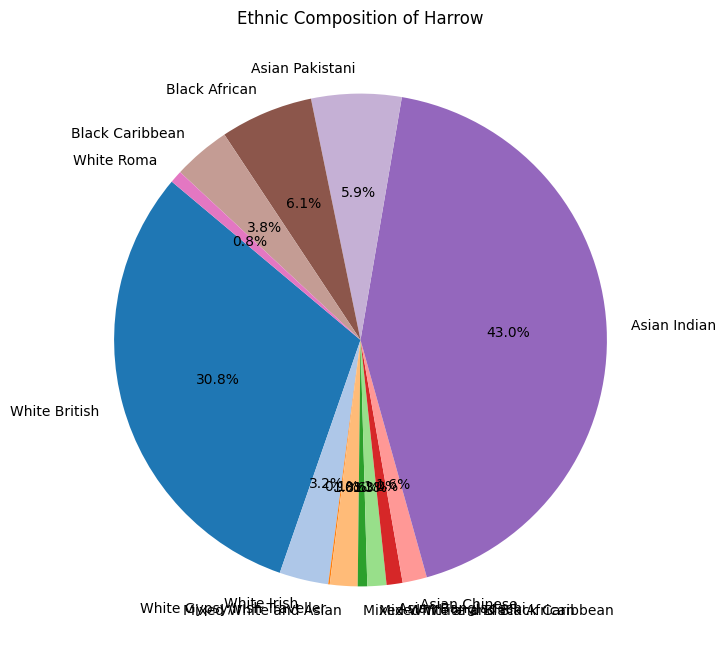

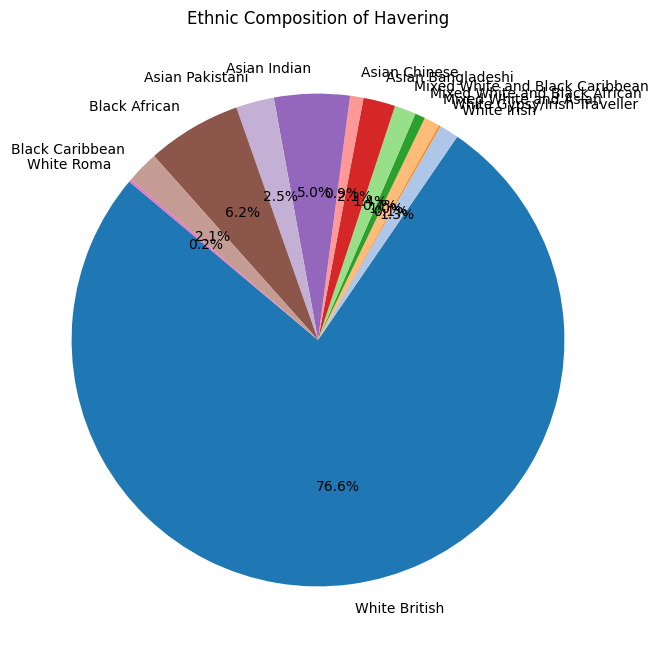

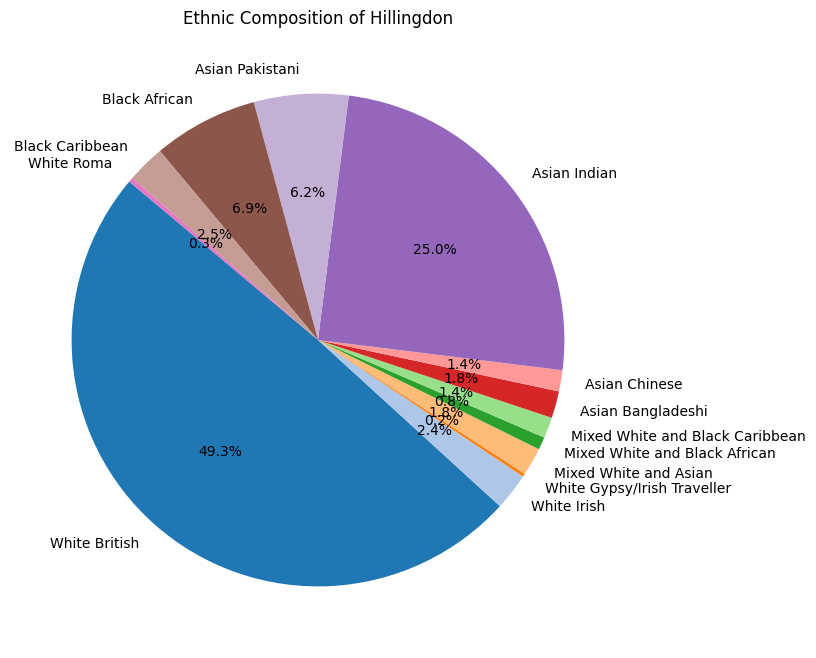

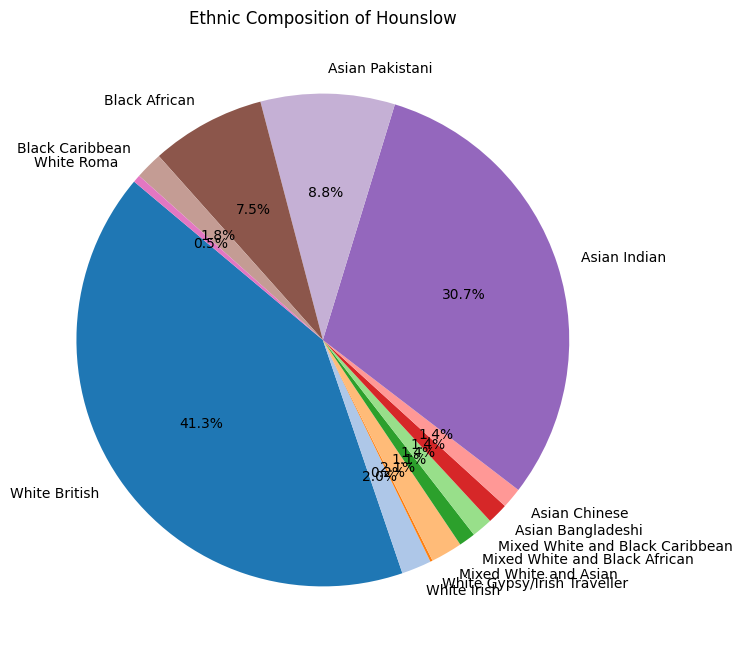

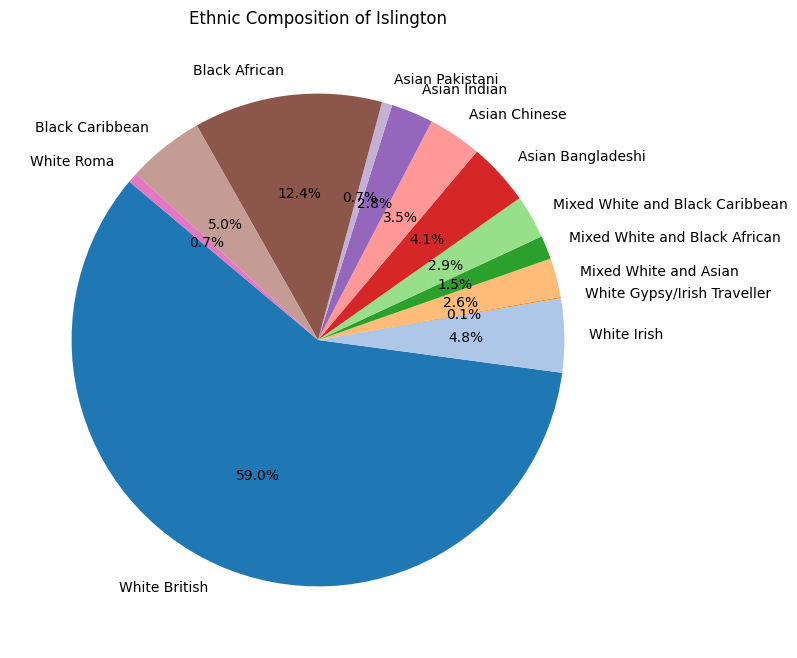

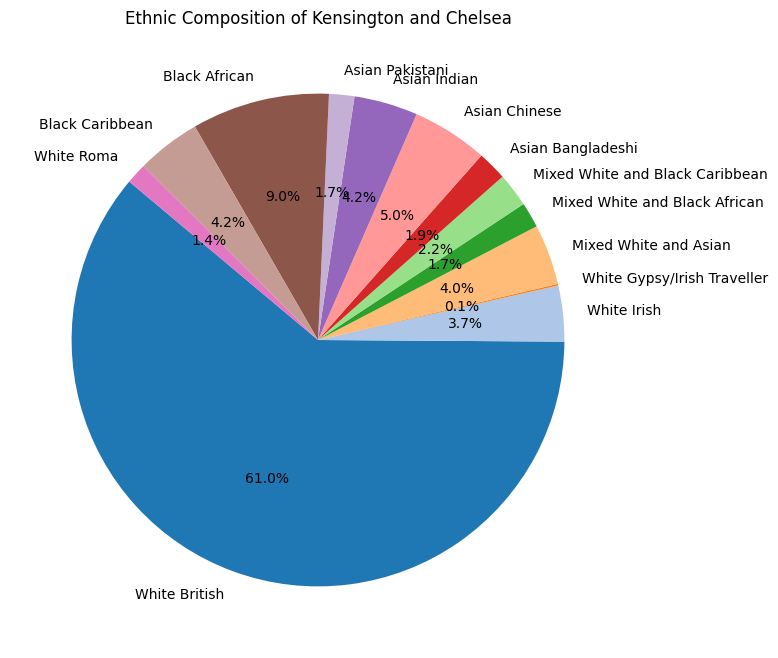

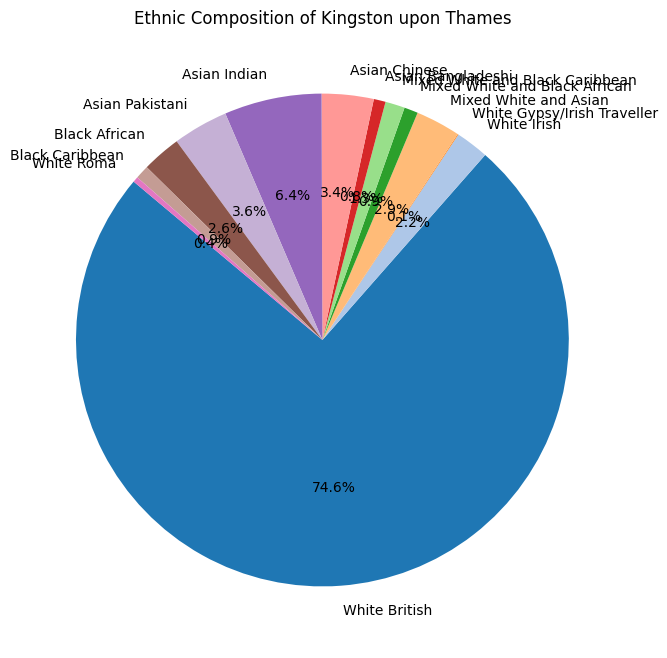

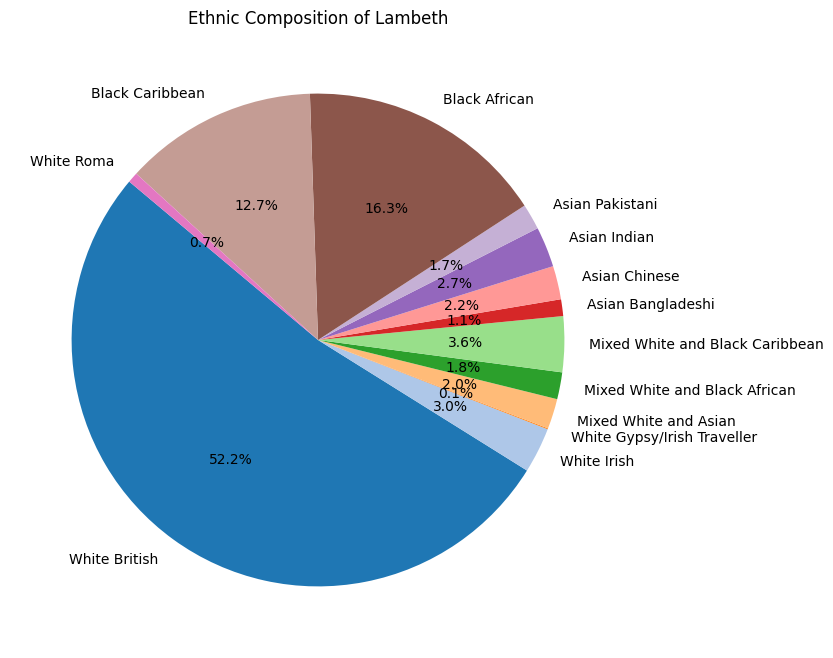

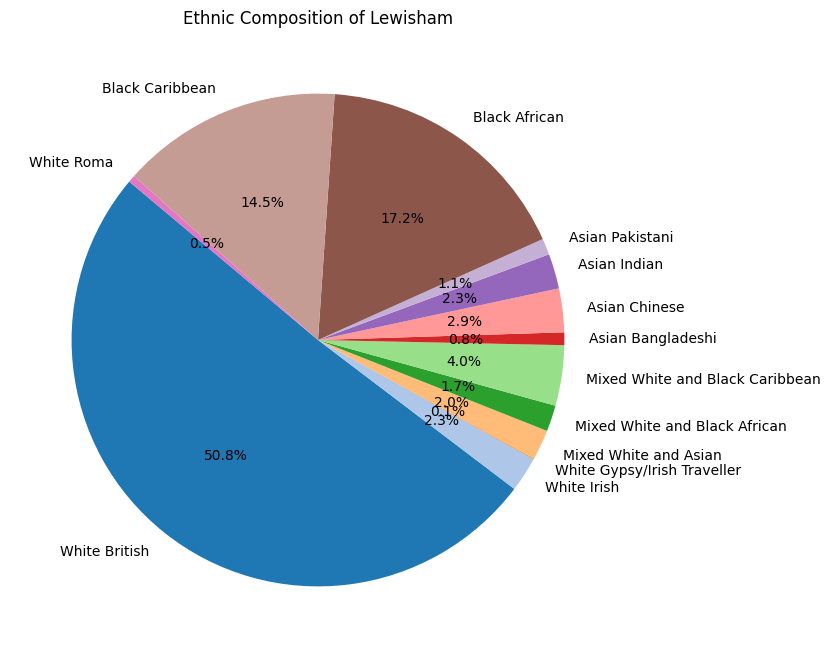

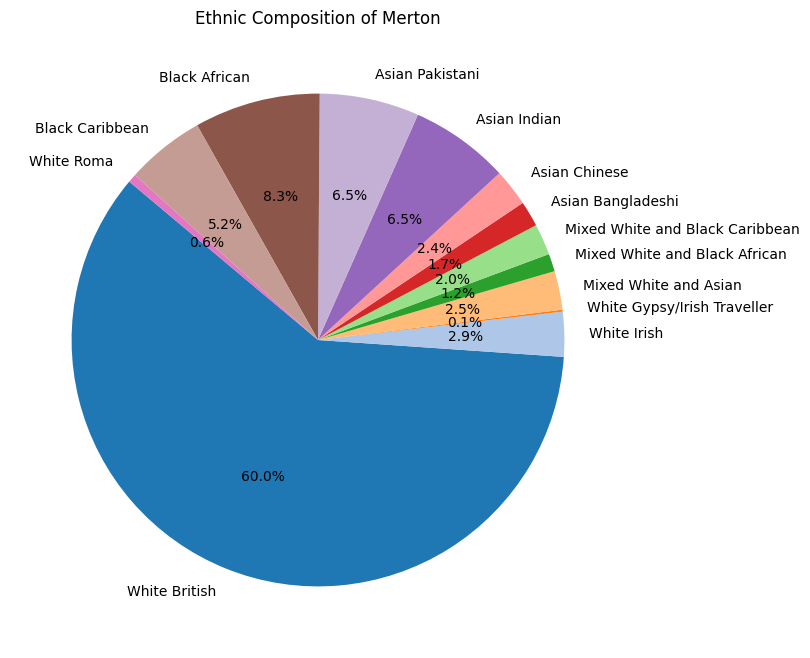

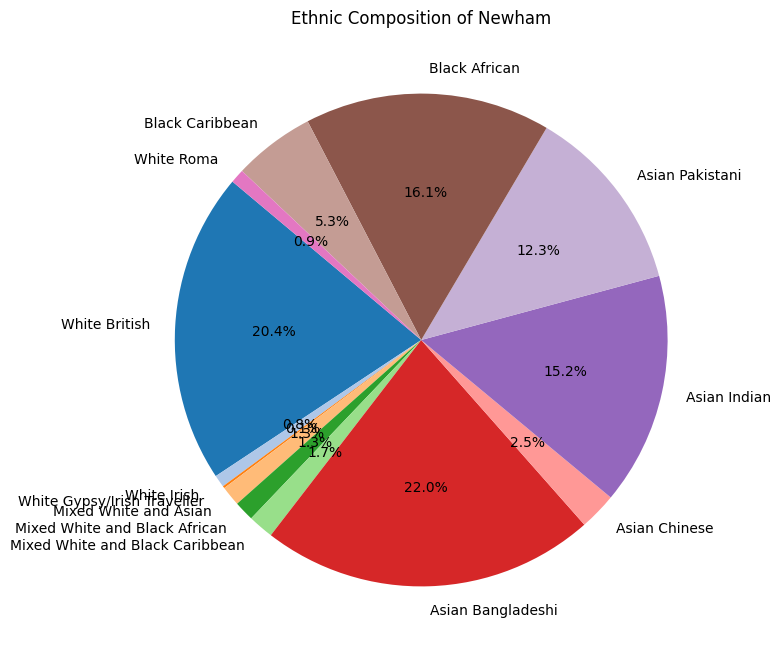

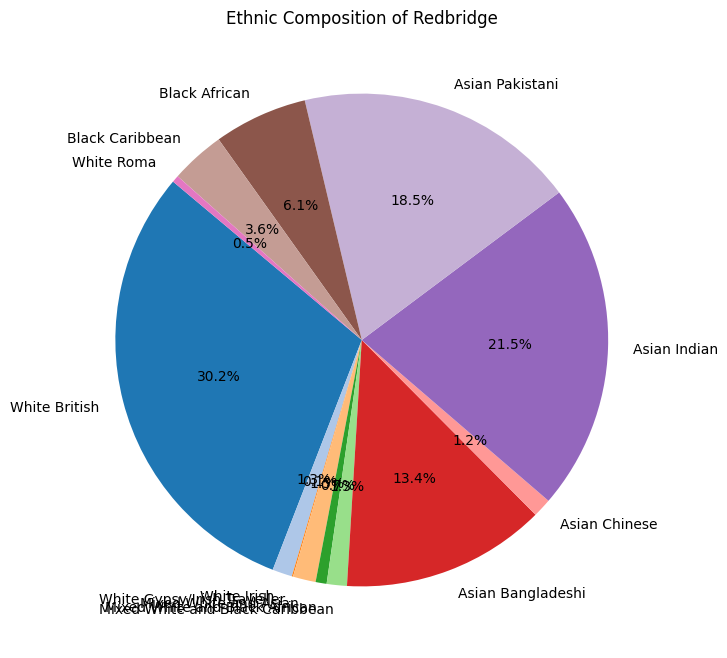

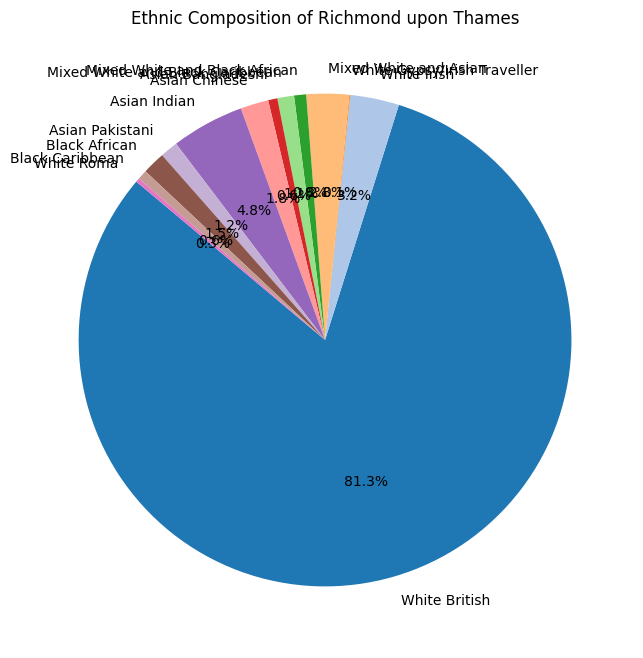

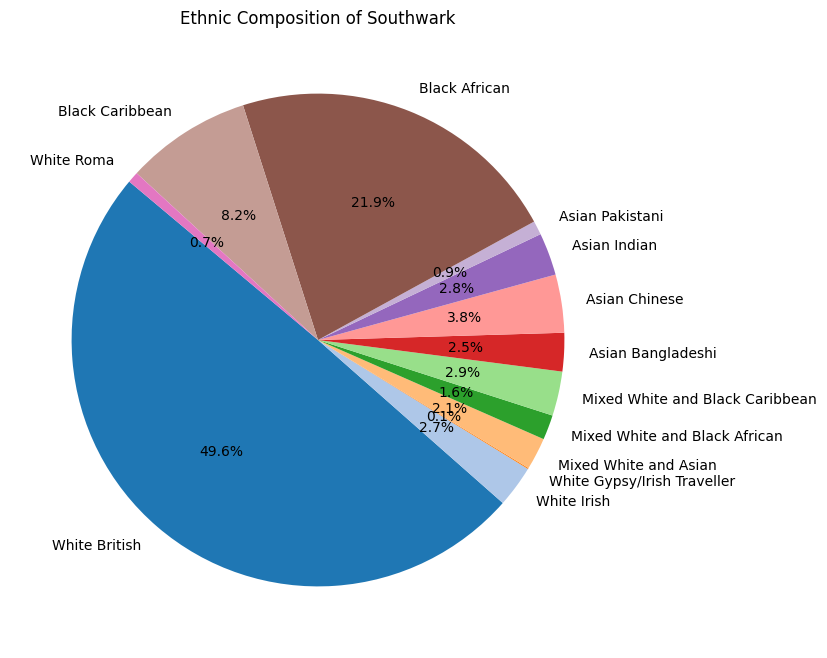

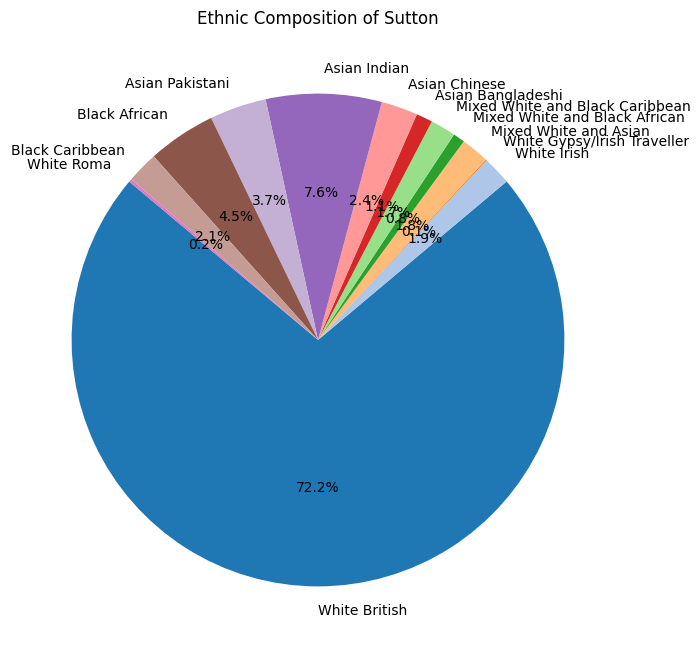

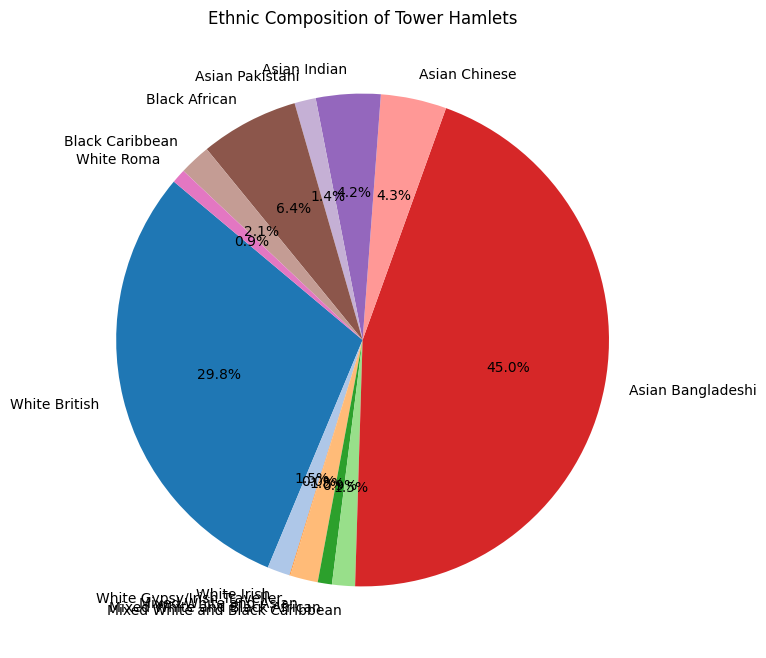

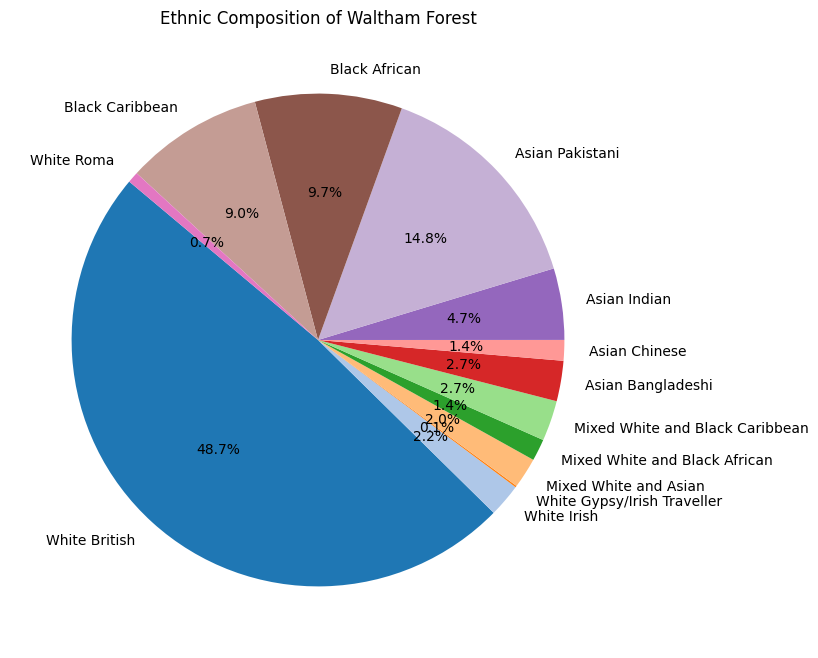

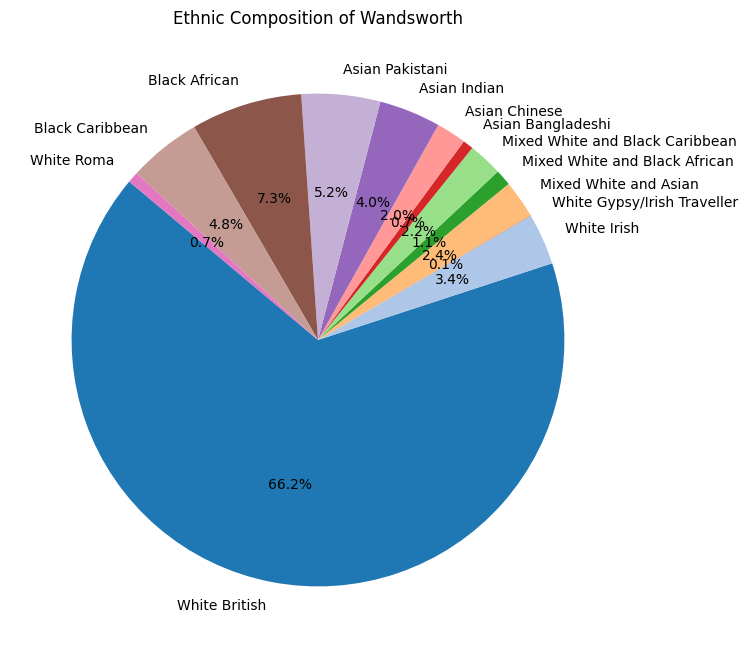

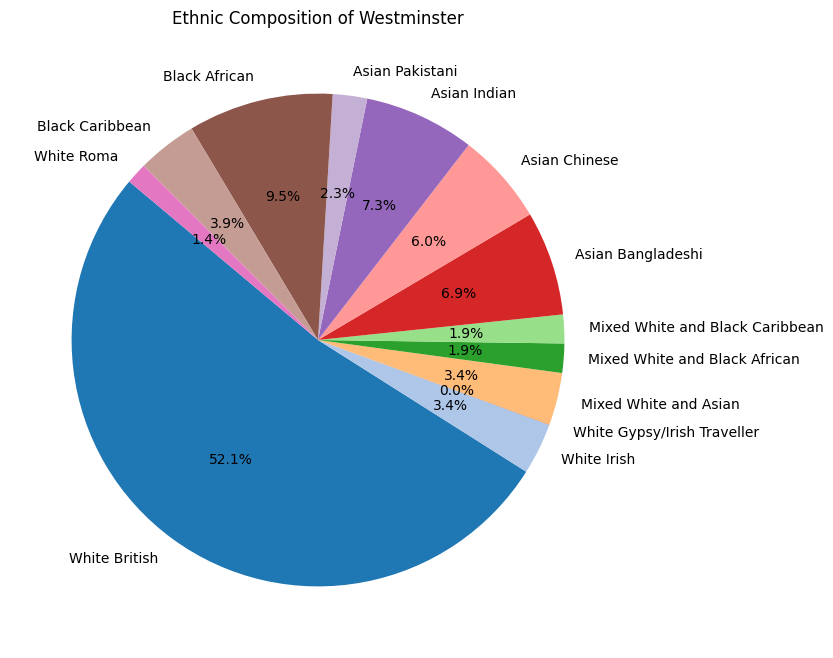

In [52]:

for borough in grouped_data.index.to_list() :

    borough_data = grouped_data.loc[borough, ethnic_columns]

    plt.figure(figsize=(8, 8))
    plt.pie(borough_data, labels=ethnic_columns, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab20", len(ethnic_columns)))
    plt.title(f"Ethnic Composition of {borough}")
    plt.show()

In [53]:
grouped_data

White British  White Irish  \
local authority name                                 
Barking and Dagenham            67558         1191   
Barnet                         140792         7629   
Bexley                         158871         2523   
Brent                           51629         9302   
Bromley                        219488         4962   
Camden                          74343         5330   
City of London                   3652          186   
Croydon                        146256         4914   
Ealing                          89263         8526   
Enfield                        103123         5968   
Greenwich                      119678         4250   
Hackney                         87919         5579   
Hammersmith and Fulham          70095         4809   
Haringey                        84309         5711   
Harrow                          53565         5595   
Havering                       174252         2903   
Hillingdon                     113355         5592   
Hounslow                        81945         3886   
Islington                       86101         7077   
Kensington and Chelsea          46875         2811   
Kingston upon Thames            90262         2636   
Lambeth                        119410         6825   
Lewisham                       111717         5038   
Merton                          88662         4332   
Newham                          51799         2046   
Redbridge                       71874         3102   
Richmond upon Thames           123085         4866   
Southwark                      109247         6029   
Sutton                         120043         3117   
Tower Hamlets                   71175         3551   
Waltham Forest                  94769         4236   
Wandsworth                     157030         8053   
Westminster                     57201         3720   

                        White Gypsy/Irish Traveller  Mixed White and Asian  \
local authority name                                                         
Barking and Dagenham                            189                   1549   
Barnet                                          178                   6055   
Bexley                                          619                   2178   
Brent                                           236                   3627   
Bromley                                         575                   4729   
Camden                                          134                   4251   
City of London                                    0                    173   
Croydon                                         213                   5742   
Ealing                                          251                   5478   
Enfield                                         372                   3820   
Greenwich                                       386                   3458   
Hackney                                         245                   3692   
Hammersmith and Fulham                           95                   3123   
Haringey                                        228                   3946   
Harrow                                          175                   3151   
Havering                                        256                   2342   
Hillingdon                                      480                   4204   
Hounslow                                        299                   4112   
Islington                                       107                   3748   
Kensington and Chelsea                           82                   3052   
Kingston upon Thames                             63                   3550   
Lambeth                                         142                   4525   
Lewisham                                        114                   4340   
Merton                                          188                   3754   
Newham                                          354                   3324   
Redbridge                  

#### Ethnic Race wise distribution 

<Figure size 1000x1000 with 0 Axes>

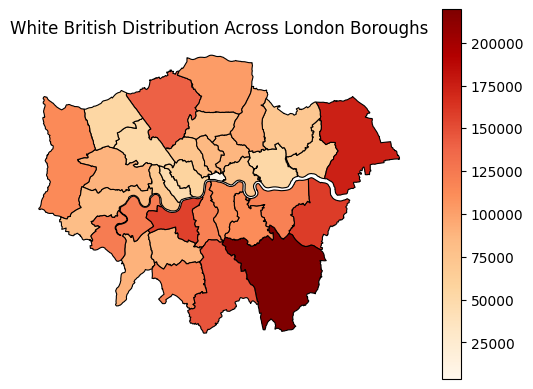

<Figure size 1000x1000 with 0 Axes>

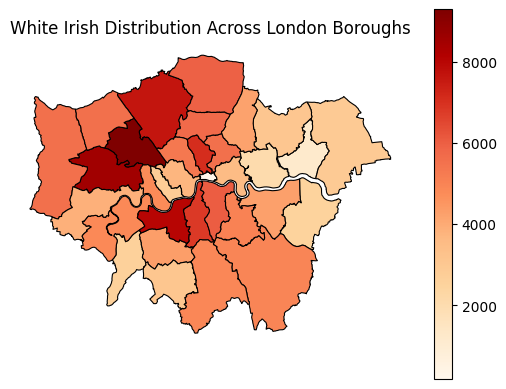

<Figure size 1000x1000 with 0 Axes>

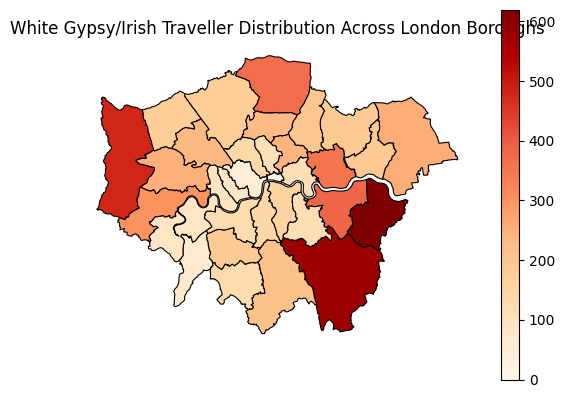

<Figure size 1000x1000 with 0 Axes>

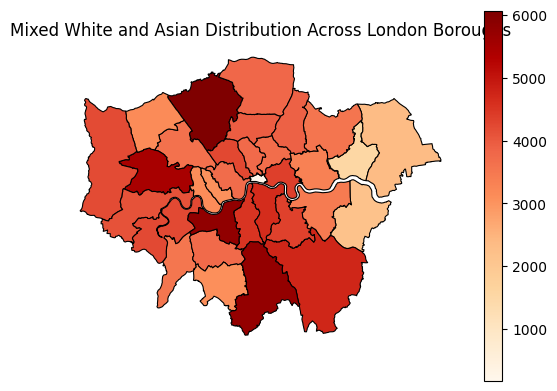

<Figure size 1000x1000 with 0 Axes>

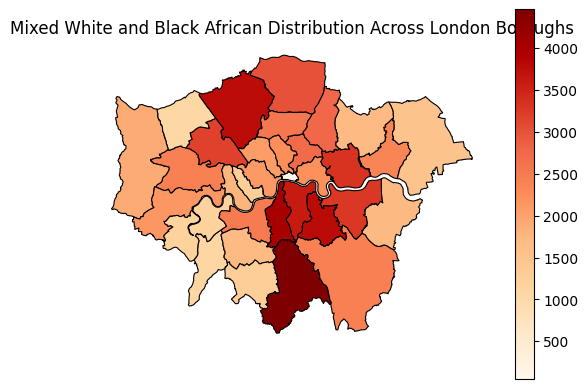

<Figure size 1000x1000 with 0 Axes>

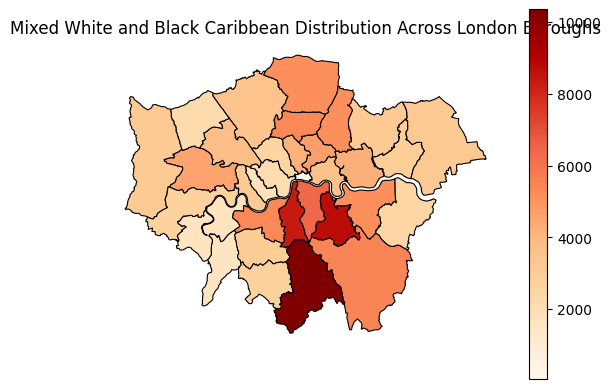

<Figure size 1000x1000 with 0 Axes>

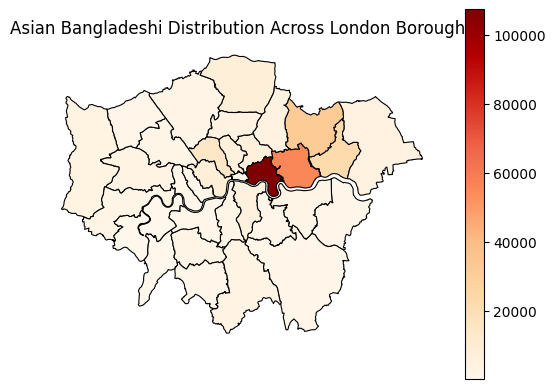

<Figure size 1000x1000 with 0 Axes>

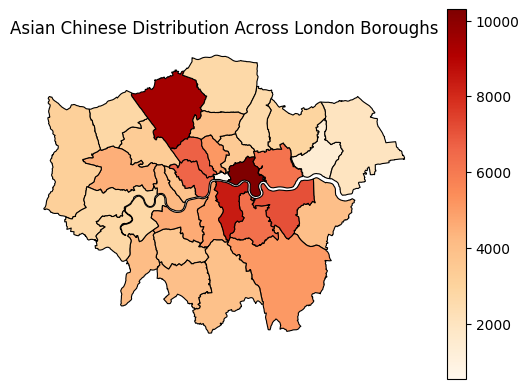

<Figure size 1000x1000 with 0 Axes>

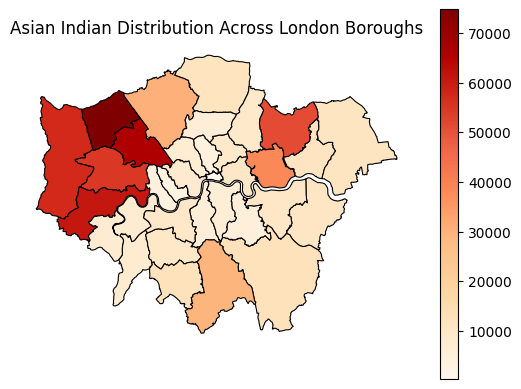

<Figure size 1000x1000 with 0 Axes>

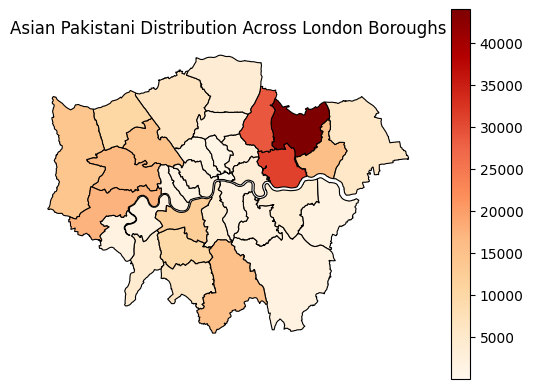

<Figure size 1000x1000 with 0 Axes>

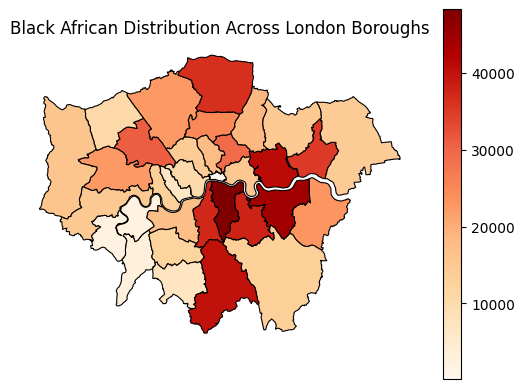

<Figure size 1000x1000 with 0 Axes>

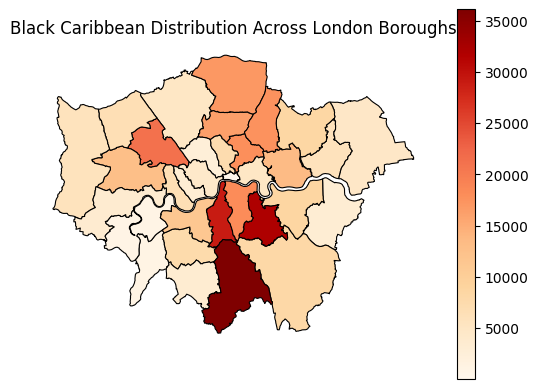

<Figure size 1000x1000 with 0 Axes>

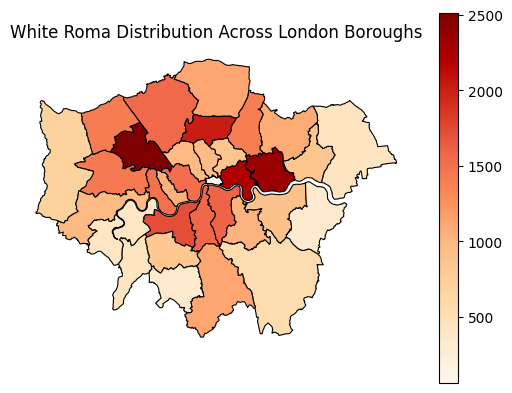

<Figure size 1000x1000 with 0 Axes>

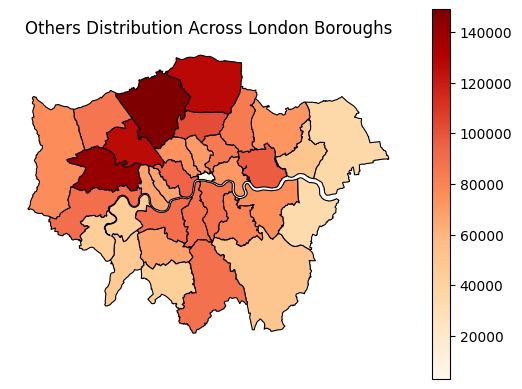

In [54]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the census data
# Assuming 'grouped_data' is already available as the grouped census DataFrame

# Load the GeoJSON file
geo_df = gpd.read_file('london_421.geojson')

# Ensure the 'local authority name' column in your data matches the borough names in the geo_df
geo_df = geo_df.rename(columns={'name': 'local authority name'})  # Update with actual column name
merged_data = geo_df.merge(grouped_data, on='local authority name', how='left')

# Plot the choropleth for each ethnic group
ethnic_columns = grouped_data.columns[:-1]  # All ethnic columns, excluding 'Total Population'

# 1. Plotting a map for each ethnic group distribution
for column in ethnic_columns:
    plt.figure(figsize=(10, 10))
    merged_data.plot(column=column, cmap='OrRd', linewidth=0.8, edgecolor='black', legend=True)
    plt.title(f"{column} Distribution Across London Boroughs")
    plt.axis('off')
    plt.show()


In [55]:
grouped_data

White British  White Irish  \
local authority name                                 
Barking and Dagenham            67558         1191   
Barnet                         140792         7629   
Bexley                         158871         2523   
Brent                           51629         9302   
Bromley                        219488         4962   
Camden                          74343         5330   
City of London                   3652          186   
Croydon                        146256         4914   
Ealing                          89263         8526   
Enfield                        103123         5968   
Greenwich                      119678         4250   
Hackney                         87919         5579   
Hammersmith and Fulham          70095         4809   
Haringey                        84309         5711   
Harrow                          53565         5595   
Havering                       174252         2903   
Hillingdon                     113355         5592   
Hounslow                        81945         3886   
Islington                       86101         7077   
Kensington and Chelsea          46875         2811   
Kingston upon Thames            90262         2636   
Lambeth                        119410         6825   
Lewisham                       111717         5038   
Merton                          88662         4332   
Newham                          51799         2046   
Redbridge                       71874         3102   
Richmond upon Thames           123085         4866   
Southwark                      109247         6029   
Sutton                         120043         3117   
Tower Hamlets                   71175         3551   
Waltham Forest                  94769         4236   
Wandsworth                     157030         8053   
Westminster                     57201         3720   

                        White Gypsy/Irish Traveller  Mixed White and Asian  \
local authority name                                                         
Barking and Dagenham                            189                   1549   
Barnet                                          178                   6055   
Bexley                                          619                   2178   
Brent                                           236                   3627   
Bromley                                         575                   4729   
Camden                                          134                   4251   
City of London                                    0                    173   
Croydon                                         213                   5742   
Ealing                                          251                   5478   
Enfield                                         372                   3820   
Greenwich                                       386                   3458   
Hackney                                         245                   3692   
Hammersmith and Fulham                           95                   3123   
Haringey                                        228                   3946   
Harrow                                          175                   3151   
Havering                                        256                   2342   
Hillingdon                                      480                   4204   
Hounslow                                        299                   4112   
Islington                                       107                   3748   
Kensington and Chelsea                           82                   3052   
Kingston upon Thames                             63                   3550   
Lambeth                                         142                   4525   
Lewisham                                        114                   4340   
Merton                                          188                   3754   
Newham                                          354                   3324   
Redbridge                  

In [56]:
merged_data

local authority name  cartodb_id                created_at  \
0     Barking and Dagenham           1 2013-09-16 02:14:14+02:00   
1                   Barnet           2 2013-09-16 02:14:14+02:00   
2                   Bexley           3 2013-09-16 02:14:14+02:00   
3                    Brent           4 2013-09-16 02:14:14+02:00   
4                  Bromley           5 2013-09-16 02:14:14+02:00   
5                   Camden           6 2013-09-16 02:14:14+02:00   
6           City of London           7 2013-09-16 02:14:14+02:00   
7                   Ealing           8 2013-09-16 02:14:14+02:00   
8                  Enfield           9 2013-09-16 02:14:14+02:00   
9                Greenwich          10 2013-09-16 02:14:14+02:00   
10                 Hackney          11 2013-09-16 02:14:14+02:00   
11  Hammersmith and Fulham          12 2013-09-16 02:14:14+02:00   
12                Haringey          13 2013-09-16 02:14:14+02:00   
13                  Harrow          14 2013-09-16 02:14:14+02:00   
14                Havering          15 2013-09-16 02:14:14+02:00   
15              Hillingdon          16 2013-09-16 02:14:14+02:00   
16                Hounslow          17 2013-09-16 02:14:14+02:00   
17               Islington          18 2013-09-16 02:14:14+02:00   
18  Kensington and Chelsea          19 2013-09-16 02:14:14+02:00   
19    Kingston upon Thames          20 2013-09-16 02:14:14+02:00   
20                 Lambeth          21 2013-09-16 02:14:14+02:00   
21                Lewisham          22 2013-09-16 02:14:14+02:00   
22                  Merton          23 2013-09-16 02:14:14+02:00   
23                  Newham          24 2013-09-16 02:14:14+02:00   
24               Redbridge          25 2013-09-16 02:14:14+02:00   
25    Richmond upon Thames          26 2013-09-16 02:14:14+02:00   
26               Southwark          27 2013-09-16 02:14:14+02:00   
27                  Sutton          28 2013-09-16 02:14:14+02:00   
28           Tower Hamlets          29 2013-09-16 02:14:14+02:00   
29          Waltham Forest          30 2013-09-16 02:14:14+02:00   
30              Wandsworth          31 2013-09-16 02:14:14+02:00   
31             Westminster          32 2013-09-16 02:14:14+02:00   
32                 Croydon          33 2013-09-16 02:14:14+02:00   

                  updated_at  \
0  2013-09-16 02:14:14+02:00   
1  2013-09-16 02:14:14+02:00   
2  2013-09-16 02:14:14+02:00   
3  2013-09-16 02:14:14+02:00   
4  2013-09-16 02:14:14+02:00   
5  2013-09-16 02:14:14+02:00   
6  2013-09-16 02:14:14+02:00   
7  2013-09-16 02:14:14+02:00   
8  2013-09-16 02:14:14+02:00   
9  2013-09-16 02:14:14+02:00   
10 2013-09-16 02:14:14+02:00   
11 2013-09-16 02:14:14+02:00   
12 2013-09-16 02:14:14+02:00   
13 2013-09-16 02:14:14+02:00   
14 2013-09-16 02:14:14+02:00   
15 2013-09-16 02:14:14+02:00   
16 2013-09-16 02:14:14+02:00   
17 2013-09-16 02:14:14+02:00   
18 2013-09-16 02:14:14+02:00   
19 2013-09-16 02:14:14+02:00   
20 2013-09-16 02:14:14+02:00   
21 2013-09-16 02:14:14+02:00   
22 2013-09-16 02:14:14+02:00   
23 2013-09-16 02:14:14+02:00   
24 2013-09-16 02:14:14+02:00   
25 2013-09-16 02:14:14+02:00   
26 2013-09-16 02:14:14+02:00   
27 2013-09-16 02:14:14+02:00   
28 2013-09-16 02:14:14+02:00   
29 2013-09-16 02:14:14+02:00   
30 2013-09-16 02:14:14+02:00   
31 2013-09-16 02:14:14+02:00   
32 2013-09-16 02:14:14+02:00   

                                             geometry  White British  \
0   MULTIPOLYGON (((0.06833 51.54441, 0.06705 51.5...          67558   
1   POLYGON ((-0.26716 51.60037, -0.26573 51.59901...         140792   
2   POLYGON ((0.07532 51.43203, 0.08068 51.43082, ...         158871   
3   POLYGON ((-0.33558 51.55658, -0.33224 51.55589...          51629   
4   POLYGON ((0.00227 51.32914, 0.00316 51.32699, ...         219488   
5   POLYGON ((-0.14844 51.52785, -0.1472 51.52504,...          74343   
6   POLYGON ((-0.07582 51.51583, -0.07692 51.51671...           3652   
7   POLYGON ((-0.25308 51.50

#### Dot plot for London 

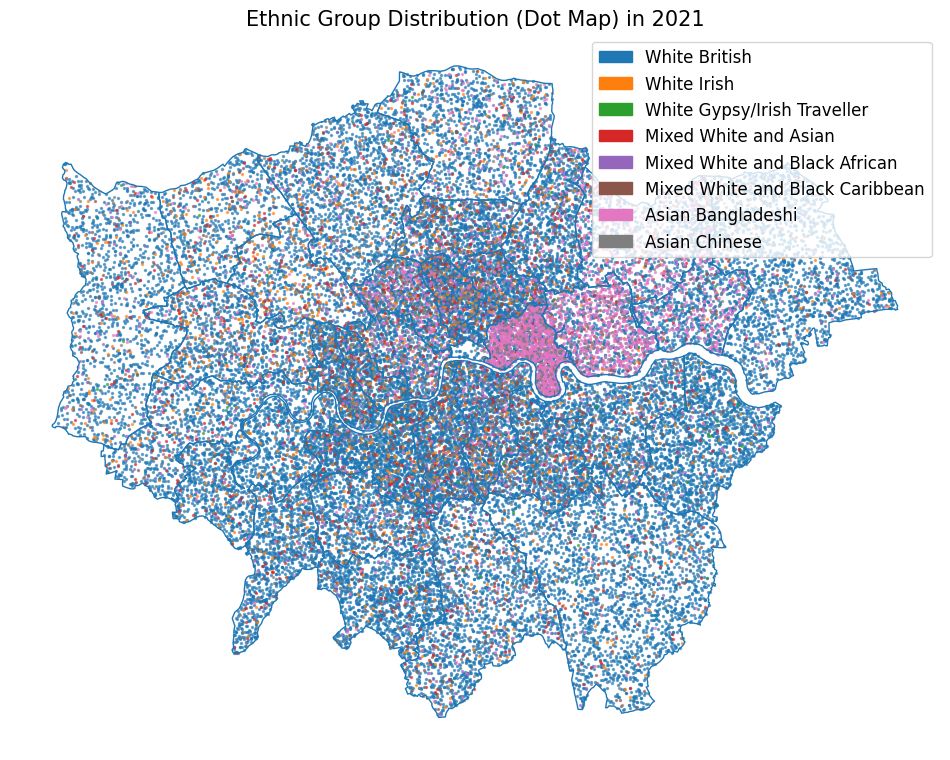

In [57]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import random
from shapely.geometry import Point
import matplotlib.patches as mpatches  # For custom legend

# Load the census data
# Assuming 'grouped_data' is already available as the grouped census DataFrame
def random_point_in_polygon(polygon):
    """Generate a random point within a polygon"""
    minx, miny, maxx, maxy = polygon.bounds
    while True:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        point = Point(x, y)
        if polygon.contains(point):
            return x, y


# Load the GeoJSON file
geo_df = gpd.read_file('london_421.geojson')
geo_df = geo_df.rename(columns={'name': 'local authority name'})  # Adjust if necessary
merged_data = geo_df.merge(grouped_data, on='local authority name', how='left')


# Define ethnic groups and their colors
ethnic_columns = grouped_data.columns[:-1]  # Excluding 'Total Population'
ethnic_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Sampling factor - Adjust this to control the density of dots
sampling_factor = 0.01  # For example, only plot 1% of the population

# Loop through each borough and generate points for each ethnic group
for borough, row in merged_data.iterrows():
    for ethnic_group, color in zip(ethnic_columns, ethnic_colors):
        population = row[ethnic_group]
        
        # Generate random points within the geometry of the borough, scaling population
        if population > 0:
            # Get the borough's polygon shape
            borough_geom = row['geometry']
            
            # Calculate the number of points to plot based on the population and sampling factor
            num_points = int(population * sampling_factor)  # Reduce number of points by sampling factor
            
            # Generate random points within the borough's boundary
            points = []
            for _ in range(num_points):
                x, y = random_point_in_polygon(borough_geom)
                points.append((x, y))
            
            # Convert points to a 2D numpy array (for scatter plotting)
            points = np.array(points)
            
            # Plot points only if there are any generated points
            if points.size > 0:
                ax.scatter(points[:, 0], points[:, 1], color=color, alpha=0.6, s=2)

# Plot the map
geo_df.boundary.plot(ax=ax, linewidth=1)
ax.set_title('Ethnic Group Distribution (Dot Map) in 2021', fontsize=15)
plt.axis('off')

# Create a custom legend
legend_labels = ethnic_columns  # Ethnic group names
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(ethnic_colors, legend_labels)]
ax.legend(handles=legend_patches, loc='upper right', fontsize=12)

plt.show()

# Function to generate a random point within a polygon


#### Metrices

In [58]:
import numpy as np
import pandas as pd

# Assuming 'grouped_data' is your DataFrame with ethnic population data

# Step 1: Calculate the proportions of each ethnic group in each borough
ethnic_columns = grouped_data.columns[:-1]  # Exclude 'Total Population'
grouped_data_proportions = grouped_data[ethnic_columns].div(grouped_data['Total_Population'], axis=0)

# Initialize an empty dictionary to store the metrics
metrics = {}

# Step 2: Calculate Shannon Diversity Index (SDI)
def shannon_diversity(proportions):
    return -np.sum(proportions * np.log(proportions + 1e-9))  # Adding a small value to avoid log(0)

# Calculate SDI for each borough
metrics['Shannon Diversity Index'] = grouped_data_proportions.apply(shannon_diversity, axis=1)

# Step 3: Calculate Simpson's Diversity Index
def simpsons_diversity(proportions):
    return 1 - np.sum(proportions ** 2)

# Calculate Simpson's Diversity Index for each borough
metrics['Simpson Diversity Index'] = grouped_data_proportions.apply(simpsons_diversity, axis=1)

# Step 4: Calculate the Ethnic Fractionalization Index (EFI)
def ethnic_fractionalization(proportions):
    return 1 - np.sum(proportions ** 2)

# Calculate EFI for each borough
metrics['Ethnic Fractionalization Index'] = grouped_data_proportions.apply(ethnic_fractionalization, axis=1)

# Step 5: Calculate Evenness Index (H' / ln(S), where S is the number of ethnic groups)
def evenness_index(row):
    shannon = shannon_diversity(row)
    num_groups = len(row)
    return shannon / np.log(num_groups)

# Calculate Evenness Index for each borough
metrics['Evenness Index'] = grouped_data_proportions.apply(evenness_index, axis=1)

# Step 6: Calculate Population Proportions for each ethnic group in each borough
ethnic_proportions = grouped_data_proportions * 100  # Convert to percentage
metrics['Ethnic Proportions'] = ethnic_proportions

# Step 7: (Optional) Calculate Dissimilarity Index between two boroughs (e.g., between Borough 1 and Borough 2)
def dissimilarity_index(group1_proportions, group2_proportions, total_population_proportions):
    return 0.5 * np.sum(np.abs(group1_proportions - group2_proportions) / total_population_proportions)

# Example: Calculate dissimilarity index between first two boroughs
borough1 = grouped_data_proportions.iloc[0]
borough2 = grouped_data_proportions.iloc[1]
total_population_proportions = grouped_data_proportions.sum(axis=0)
metrics['Dissimilarity Index'] = dissimilarity_index(borough1, borough2, total_population_proportions)

                                                     
                                        

In [59]:
metrics

{'Shannon Diversity Index': local authority name
 Barking and Dagenham      1.296050
 Barnet                    1.149642
 Bexley                    0.994583
 Brent                     1.278648
 Bromley                   0.981046
 Camden                    1.205301
 City of London            1.109163
 Croydon                   1.274226
 Ealing                    1.241787
 Enfield                   1.189551
 Greenwich                 1.184388
 Hackney                   1.228624
 Hammersmith and Fulham    1.159049
 Haringey                  1.195182
 Harrow                    1.203137
 Havering                  0.992064
 Hillingdon                1.215551
 Hounslow                  1.216390
 Islington                 1.183725
 Kensington and Chelsea    1.106376
 Kingston upon Thames      1.043732
 Lambeth                   1.222087
 Lewisham                  1.220735
 Merton                    1.188431
 Newham                    1.370494
 Redbridge                 1.331372
 Richmond upon 

    Proportions: We calculate the proportions of each ethnic group relative to the total population in each borough.
    Shannon Diversity Index (SDI): We calculate the SDI by applying the formula across all boroughs.
    Simpson’s Diversity Index: Calculated using the formula, representing the probability that two individuals belong to the same ethnic group.
    Ethnic Fractionalization Index (EFI): Indicates how likely it is that two randomly chosen individuals belong to different ethnic groups.
    Evenness Index: Measures how evenly the ethnic groups are distributed across each borough.
    Ethnic Proportions: Simply represents the percentage of each ethnic group in each borough.
    Dissimilarity Index: Optional, compares the distribution of ethnic groups between two boroughs.

Additional Metrics for Spatial Analysis:

    Segregation Index: Measures how different groups are spatially segregated within London.
    Cluster Analysis (e.g., K-Means): To identify areas with high concentrations of particular ethnic groups.